<span style="color:black;font-weight:700;font-size:32px"> 
               Выбор локации для скважины
</span>

<span style="color:black;font-weight:700;font-size:22px"> 
              Описание проекта
</span>


Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Шаги для выбора локации обычно такие:\
В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;\
Строят модель для предсказания объёма запасов в новых скважинах;\
Выбирают скважины с самыми высокими оценками значений;\
Определяют регион с максимальной суммарной прибылью отобранных скважин.

Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.

<span style="color:black;font-weight:700;font-size:22px"> 
              Инструкция по выполнению проекта
   
</span>

1. Загрузите и подготовьте данные. Поясните порядок действий.

2. Обучите и проверьте модель для каждого региона:
- 2.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.
- 2.2. Обучите модель и сделайте предсказания на валидационной выборке.
- 2.3. Сохраните предсказания и правильные ответы на валидационной выборке.
- 2.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
- 2.5. Проанализируйте результаты.

3. Подготовьтесь к расчёту прибыли:
- 3.1. Все ключевые значения для расчётов сохраните в отдельных переменных.
- 3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе. 
- 3.3. Напишите выводы по этапу подготовки расчёта прибыли.

4. Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
- 4.1. Выберите скважины с максимальными значениями предсказаний. 
- 4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
- 4.3. Рассчитайте прибыль для полученного объёма сырья.

5. Посчитайте риски и прибыль для каждого региона:
- 5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
- 5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
- 5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from math import ceil
import time

In [2]:
start_time = time.time()

# Загрузка данных


In [3]:
try:
    geo_data0_df = pd.read_csv('/datasets/geo_data_0.csv', index_col='id')
    geo_data1_df= pd.read_csv('/datasets/geo_data_1.csv', index_col='id')
    geo_data2_df = pd.read_csv('/datasets/geo_data_2.csv', index_col='id')
    
    
except:
    geo_data0_df = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv', index_col='id')
    geo_data1_df = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv', index_col='id')
    geo_data2_df = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv', index_col='id')
    

In [4]:
geo_data0_df.head()

,f0,f1,f2,product
id,,,,
txEyH,0.705745,-0.497823,1.221170,105.280062
2acmU,1.334711,-0.340164,4.365080,73.037750
409Wp,1.022732,0.151990,1.419926,85.265647
iJLyR,-0.032172,0.139033,2.978566,168.620776
Xdl7t,1.988431,0.155413,4.751769,154.036647


In [5]:
geo_data0_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, txEyH to 1CWhH
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB


In [6]:
geo_data1_df.head()

,f0,f1,f2,product
id,,,,
kBEdx,-15.001348,-8.276000,-0.005876,3.179103
62mP7,14.272088,-3.475083,0.999183,26.953261
vyE1P,6.263187,-5.948386,5.001160,134.766305
KcrkZ,-13.081196,-11.506057,4.999415,137.945408
AHL4O,12.702195,-8.147433,5.004363,134.766305


In [7]:
geo_data1_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, kBEdx to relB0
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB


In [8]:
geo_data2_df.head()

,f0,f1,f2,product
id,,,,
fwXo0,-1.146987,0.963328,-0.828965,27.758673
WJtFt,0.262778,0.269839,-2.530187,56.069697
ovLUW,0.194587,0.289035,-5.586433,62.871910
q6cA6,2.236060,-0.553760,0.930038,114.572842
WPMUX,-0.515993,1.716266,5.899011,149.600746


In [9]:
geo_data2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, fwXo0 to V9kWn
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB


<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span>

Загружены 3 датасета geo_data0_df, geo_data1_df, geo_data2_df, каждый датасет содержит по 4 признака -

id — уникальный идентификатор скважины;\
f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);\
product — объём запасов в скважине (тыс. баррелей).

Пропуски в данных отсутсвуют.


<span style="color:black;font-weight:700;font-size:22px"> 
             Предобработка данных
</span>


### Обработка geo_data0_df

Проведем предобработку данных, для этого проверим наличие дубликатов по id (есть ли повторяющиеся скважины), наличие выбросов в признаках

In [10]:
def plot_boxplot_for_df(dataset):
    numeric_cols = dataset.select_dtypes(exclude='object').columns.to_list()
    num_plots = len(numeric_cols)
    num_cols = 4
    num_rows = -(-num_plots // num_cols)  # Calculate the number of rows needed
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*4))  # Adjust figsize as needed
    
    for i, col in enumerate(numeric_cols):
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]  # Adjust indexing for single-row plots
        sns.boxplot(data=dataset, x=col, ax=ax)
        ax.set_title(f'Boxplot для {col}')
    
    for i in range(len(numeric_cols), num_rows * num_cols):
        row_idx = i // num_cols
        col_idx = i % num_cols
        if num_rows > 1:
            fig.delaxes(axes[row_idx, col_idx])
        else:
            fig.delaxes(axes[col_idx])
    
    plt.tight_layout()
    plt.show()

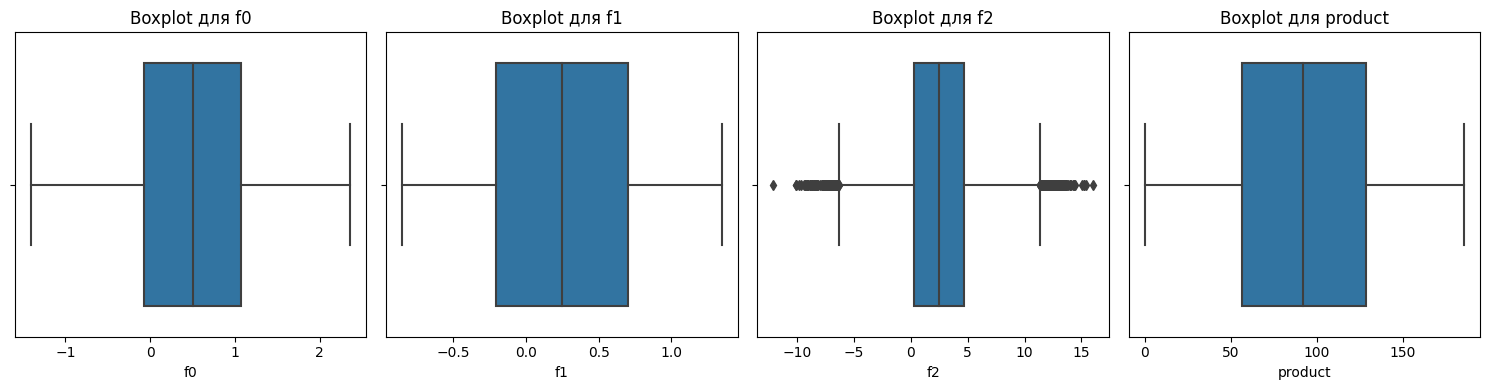

In [11]:
plot_boxplot_for_df(dataset=geo_data0_df)

В столбце f2 присутствуют выбросы, обработаем их. Для этого реализуем функцию удаления выбросов на уровне 0.01 и 0.99 квантиля

In [12]:
def filter_outliers_in_col(dataset, column, low_quantile=0.01, high_quantile=0.99):
    q_low = dataset[column].quantile(low_quantile)
    q_high = dataset[column].quantile(high_quantile)
    
    filtered_dataset = dataset[(dataset[column] < q_high) & (dataset[column] > q_low)]
    return filtered_dataset

In [13]:
geo_data0_df = filter_outliers_in_col(dataset=geo_data0_df, column='f2')

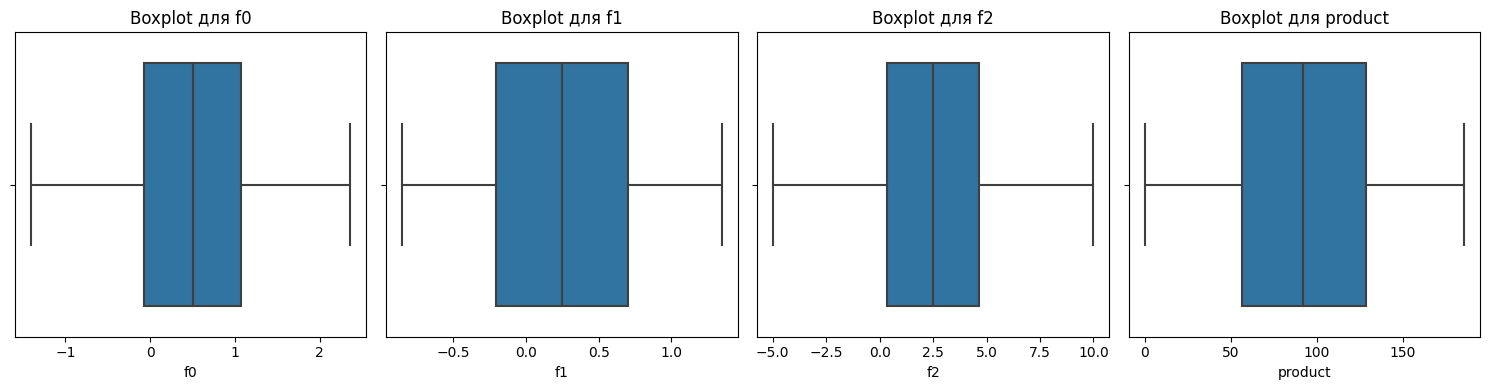

In [14]:
plot_boxplot_for_df(dataset=geo_data0_df)

Выбросы для датасета geodata0_df обработаны.

In [15]:
geo_data0_df.duplicated().sum()

0

Дубликаты в датасете отсутствуют.

Обработаем дубликаты по id скважин

In [16]:
geo_data0_df.loc[geo_data0_df[geo_data0_df.index.duplicated()].index.to_list()]

,f0,f1,f2,product
id,,,,
bxg6G,0.411645,0.856830,-3.653440,73.604260
bxg6G,-0.823752,0.546319,3.630479,93.007798
A5aEY,-0.039949,0.156872,0.209861,89.249364
A5aEY,-0.180335,0.935548,-2.094773,33.020205
QcMuo,0.506563,-0.323775,-2.215583,75.496502
QcMuo,0.635635,-0.473422,0.862670,64.578675
74z30,0.741456,0.459229,5.153109,140.771492
74z30,1.084962,-0.312358,6.990771,127.643327
AGS9W,1.454747,-0.479651,0.683380,126.370504


In [17]:
duplicates = geo_data0_df.index.duplicated()
geo_data0_df = geo_data0_df[~duplicates]

In [18]:
geo_data0_df.index.duplicated().sum()

0

Удалены дубликаты скважин в датасете geo_data0_df

### Обработка geo_data1_df

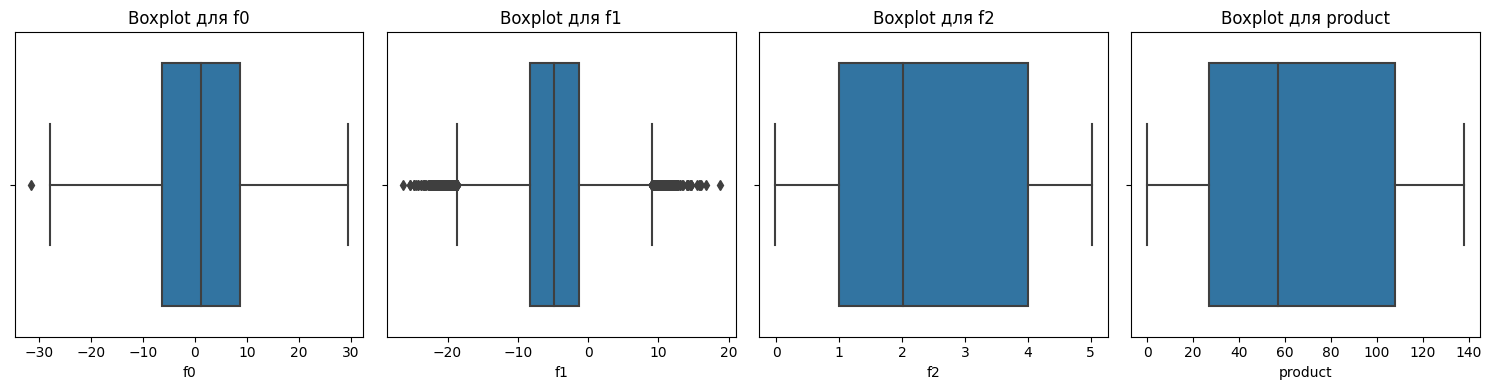

In [19]:
plot_boxplot_for_df(dataset=geo_data1_df)

In [20]:
geo_data1_df = filter_outliers_in_col(dataset=geo_data1_df, column='f1')

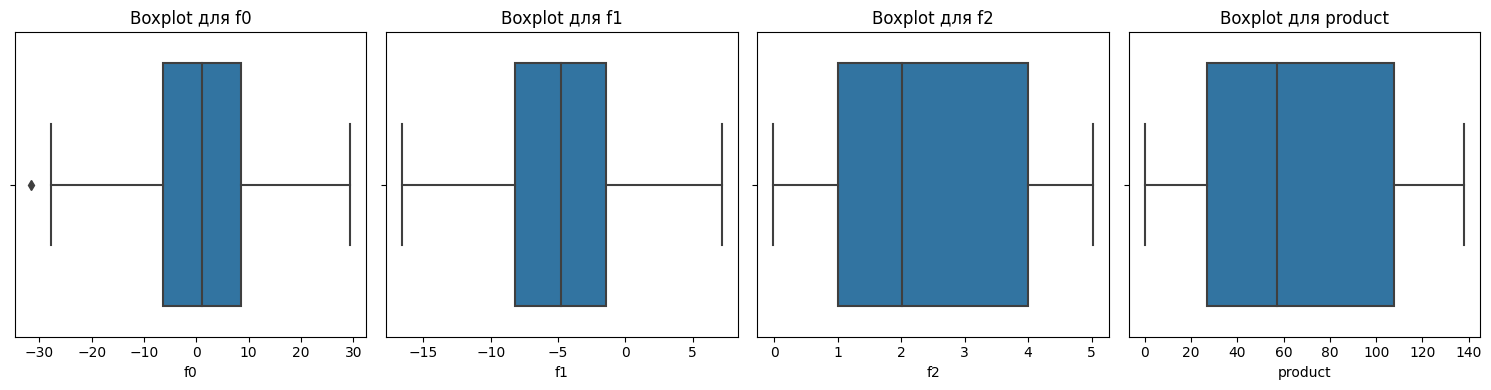

In [21]:
plot_boxplot_for_df(dataset=geo_data1_df)

Выбросы в датасете geo_data1_df обработаны

In [22]:
geo_data1_df.duplicated().sum()

0

In [23]:
geo_data1_df.loc[geo_data1_df[geo_data1_df.index.duplicated()].index.to_list()]

,f0,f1,f2,product
id,,,,
LHZR0,11.170835,-1.945066,3.002872,80.859783
LHZR0,-8.989672,-4.286607,2.009139,57.085625
bfPNe,-9.494442,-5.463692,4.006042,110.992147
bfPNe,-6.202799,-4.820045,2.995107,84.038886
wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
wt4Uk,10.259972,-9.376355,4.994297,134.766305
5ltQ6,-3.435401,-12.296043,1.999796,57.085625
5ltQ6,18.213839,2.191999,3.993869,107.813044


In [24]:
duplicates = geo_data1_df.index.duplicated()
geo_data1_df = geo_data1_df[~duplicates]

In [25]:
geo_data1_df.index.duplicated().sum()

0

Удалены дубликаты скважин в датасете geo_data1_df

### Обработка geo_data2_df

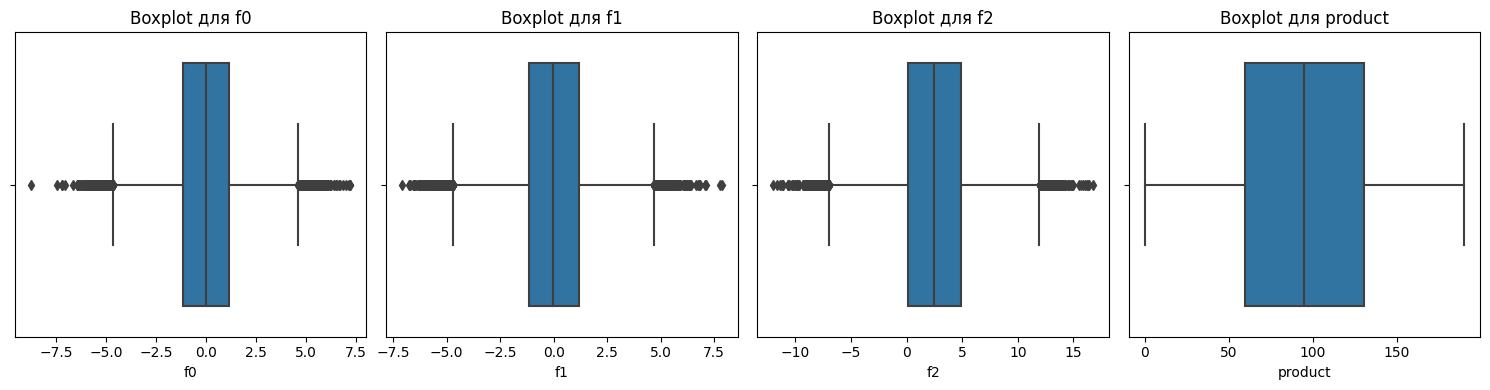

In [26]:
plot_boxplot_for_df(dataset=geo_data2_df)

In [27]:
cols_to_delete_outliers = ['f0', 'f1', 'f2']
for col in cols_to_delete_outliers:
    geo_data2_df = filter_outliers_in_col(dataset=geo_data2_df, column=col)
    

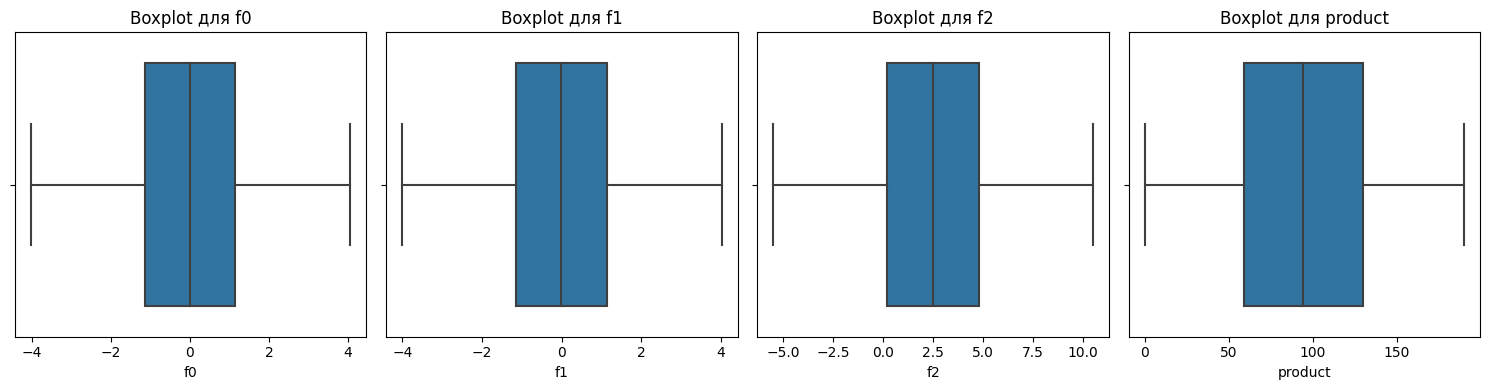

In [28]:
plot_boxplot_for_df(dataset=geo_data2_df)

Обработали выросы в датасете geo_data2_df

In [29]:
geo_data2_df.duplicated().sum()

0

In [30]:
geo_data2_df.loc[geo_data2_df[geo_data2_df.index.duplicated()].index.to_list()]

,f0,f1,f2,product
id,,,,
xCHr8,1.633027,0.368135,-2.378367,6.120525
xCHr8,-0.847066,2.101796,5.597130,184.388641
VF7Jo,2.122656,-0.858275,5.746001,181.716817
VF7Jo,-0.883115,0.560537,0.723601,136.233420
KUPhW,0.231846,-1.698941,4.990775,11.716299
KUPhW,1.211150,3.176408,5.543540,132.831802
Vcm5J,-1.229484,-2.439204,1.222909,137.968290
Vcm5J,2.587702,1.986875,2.482245,92.327572


In [31]:
duplicates = geo_data2_df.index.duplicated()
geo_data2_df = geo_data2_df[~duplicates]

In [32]:
geo_data2_df.index.duplicated().sum()

0

Удалены дубликаты скважин в датасете geo_data2_df

<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span>

На данном этапе были предобработаны датасеты. Предобработка включала в себя обработку выбросов и обработку явных и неявных дубликатов.


<span style="color:black;font-weight:700;font-size:22px"> 
             Исследовательский анализ данных
</span>


<span style="color:black;font-weight:700;font-size:16px"> 
             Датасет gea_data0_df
</span>


Исследуем корреляцию и распрелеление признаков в датасетах

In [33]:
cols_to_plot = ['f0', 'f1', 'f2', 'product']
def plot_hist(dataset):
    num_cols = 2
    num_rows = len(cols_to_plot) // num_cols + (len(cols_to_plot) % num_cols > 0) 
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))  
    plt.suptitle("Распределение признаков", y=1.02, fontsize=16) 

    for i, col in enumerate(cols_to_plot):
        row_idx = i // num_cols
        col_idx = i % num_cols
        sns.histplot(data=dataset, x=col, kde=True, ax=axes[row_idx, col_idx])
        axes[row_idx, col_idx].set_title(col)
    
    
    plt.tight_layout()
    plt.show()
    
    print(dataset.describe())
    



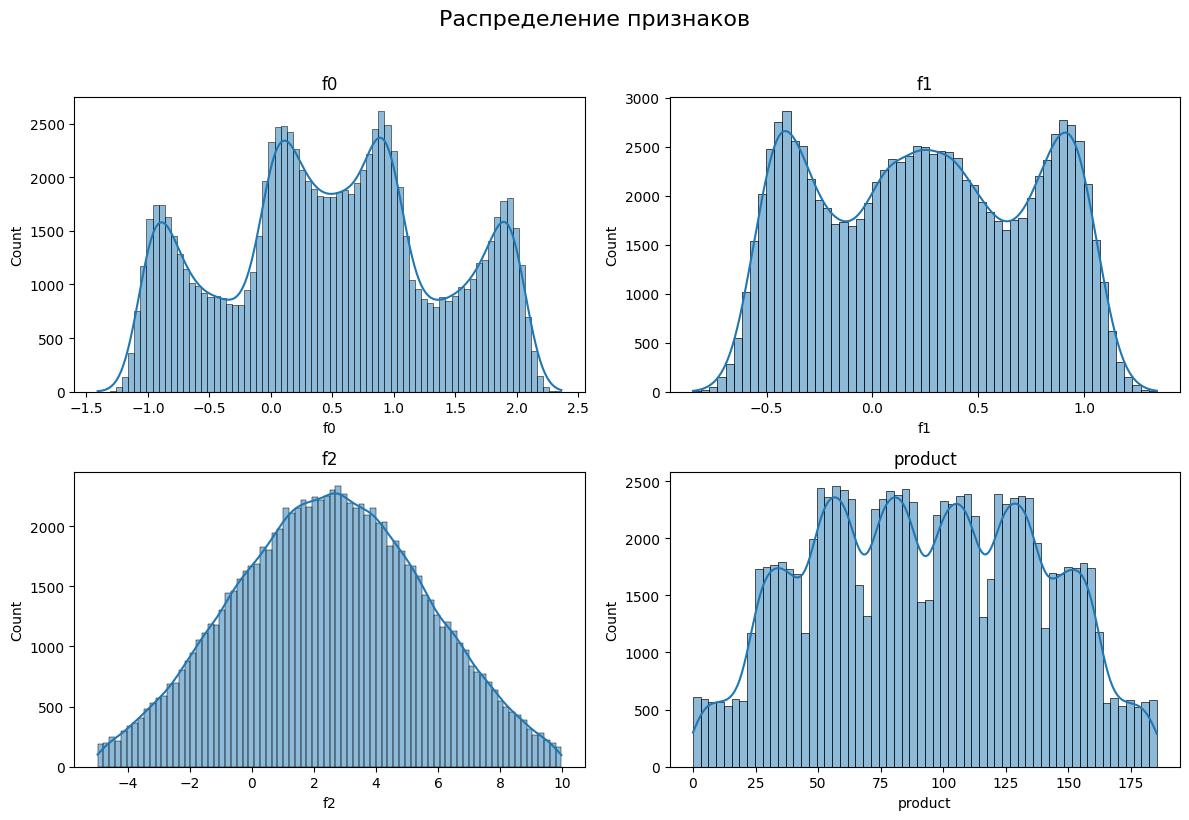

                 f0            f1            f2       product
count  97992.000000  97992.000000  97992.000000  97992.000000
mean       0.500943      0.250275      2.502337     92.468316
std        0.872036      0.504392      3.047617     44.090137
min       -1.408605     -0.848218     -4.973184      0.000000
25%       -0.072418     -0.200626      0.338791     56.673999
50%        0.502644      0.250078      2.515969     91.781256
75%        1.074146      0.700924      4.668808    128.286992
max        2.362331      1.343769      9.969316    185.364347


In [34]:
plot_hist(geo_data0_df)

Для этого региона видно что есть скважины с хорошем объемом запасов 175 тыс. баррелей

Средний объем запасов - 92 тыс. баррелей

<Axes: >

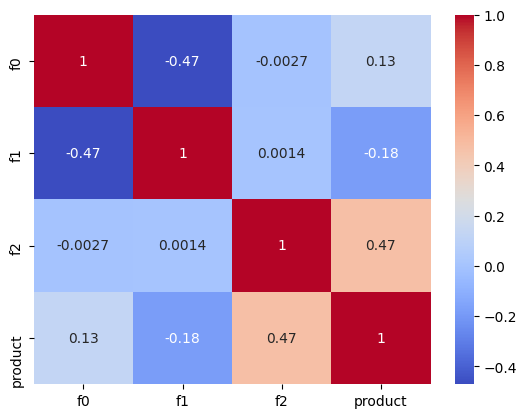

In [35]:
sns.heatmap(geo_data0_df.corr(method='spearman'), annot=True, cmap='coolwarm')

Наблюдается средняя корреляция между product и f2

<span style="color:black;font-weight:700;font-size:16px"> 
             Датасет geo_data1_df
</span>

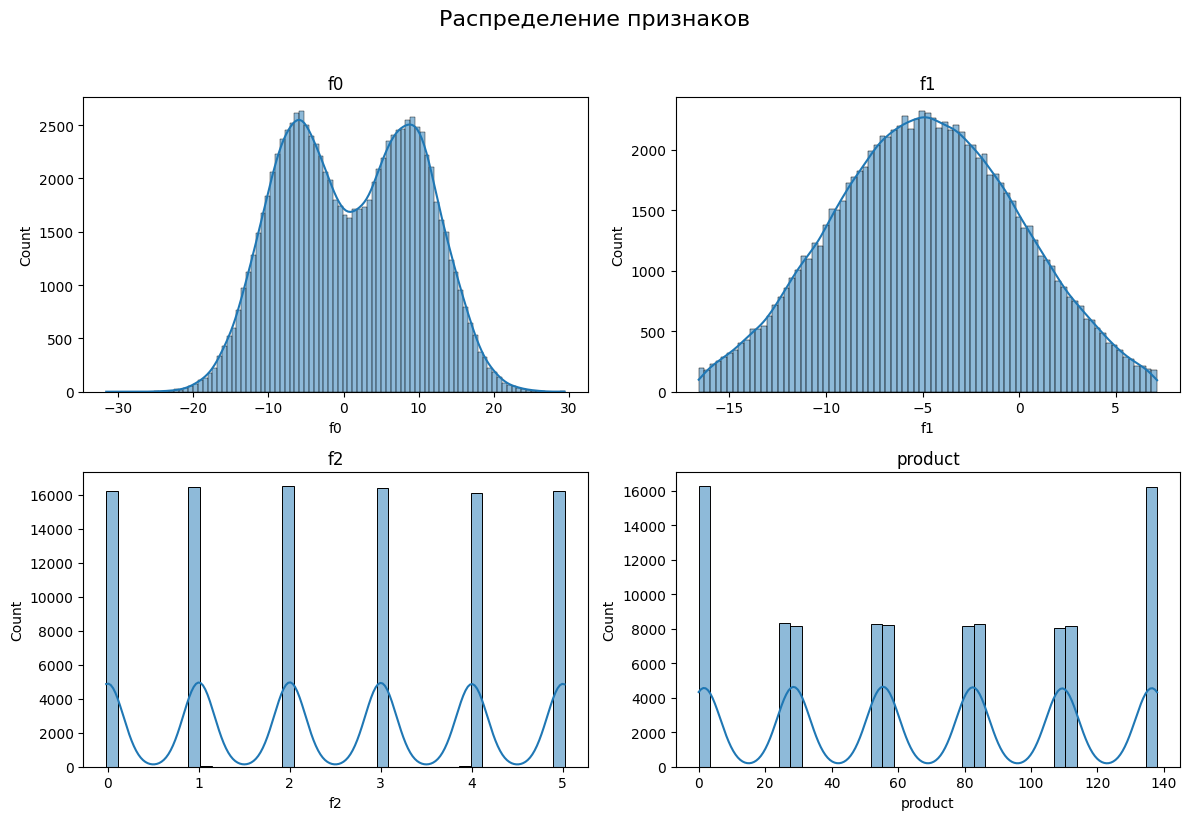

                 f0            f1            f2       product
count  97996.000000  97996.000000  97996.000000  97996.000000
mean       1.136241     -4.798160      2.493644     68.801709
std        8.967413      4.789224      1.704048     45.955447
min      -31.609576    -16.584107     -0.018144      0.000000
25%       -6.302419     -8.186294      0.999997     26.953261
50%        1.142726     -4.813172      2.011240     57.085625
75%        8.619808     -1.413709      3.999910    107.813044
max       29.421755      7.139352      5.019721    137.945408


In [36]:
plot_hist(geo_data1_df)

В этом регионе наблюдается меньше скважин с объемом в 175 т.б. и выше
Средний объем 68.8 тыс.б.

<Axes: >

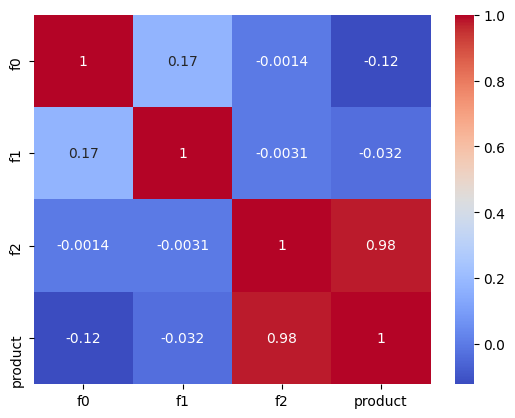

In [37]:
sns.heatmap(geo_data1_df.corr(method='spearman'), annot=True, cmap='coolwarm')

Наблюдается очень сильная корреляция между признаками f2 и product/

<span style="color:black;font-weight:700;font-size:16px"> 
             Датасет geo_data2_df
</span>

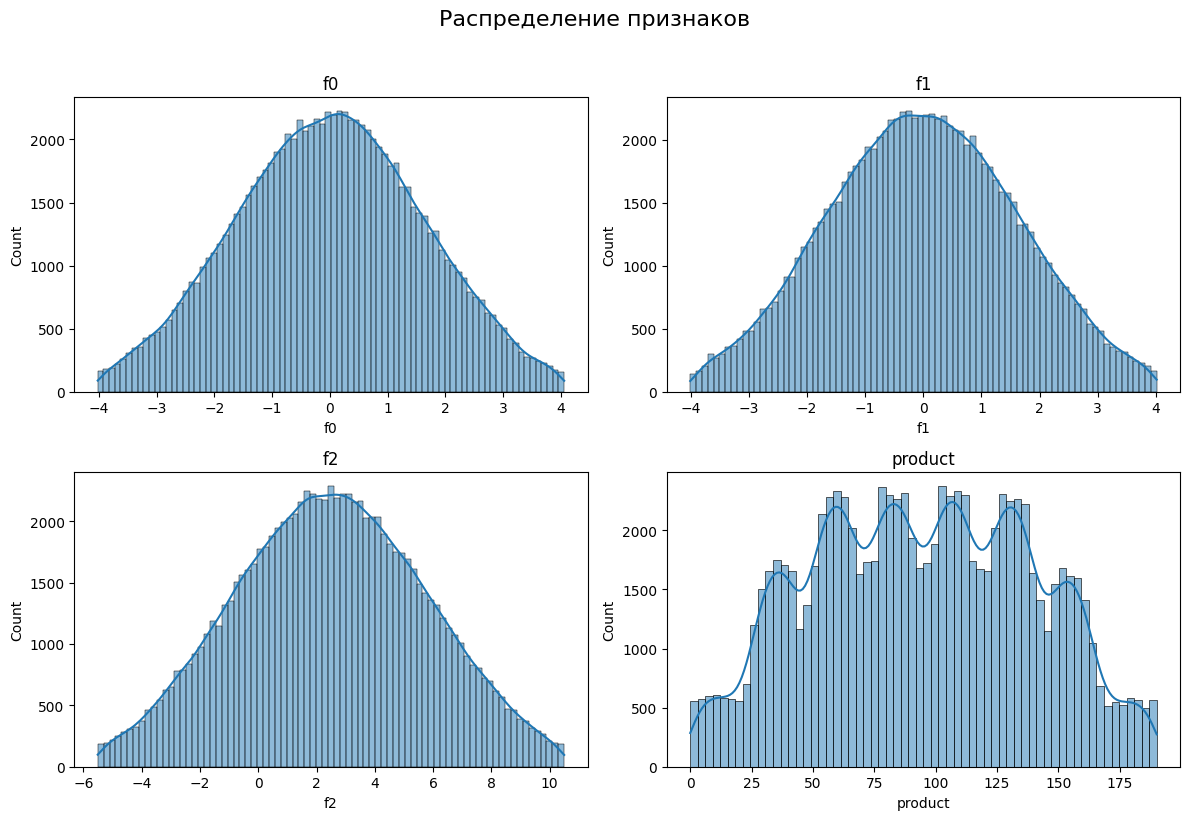

                 f0            f1            f2       product
count  94114.000000  94114.000000  94114.000000  94114.000000
mean       0.002654     -0.002087      2.491717     94.388128
std        1.617720      1.617269      3.253577     44.558036
min       -4.021429     -4.006056     -5.508529      0.000000
25%       -1.134547     -1.145861      0.183696     59.101815
50%        0.009566     -0.008548      2.482652     94.263323
75%        1.131699      1.137454      4.794570    129.814494
max        4.057776      4.013993     10.495257    190.029838


In [38]:
plot_hist(geo_data2_df)

В этом регионе также наблюдается скважины с объемом 175 тыс. б и выше, но при этом средний объем 94.4 в этом регионе выше чем в первом регионе

<Axes: >

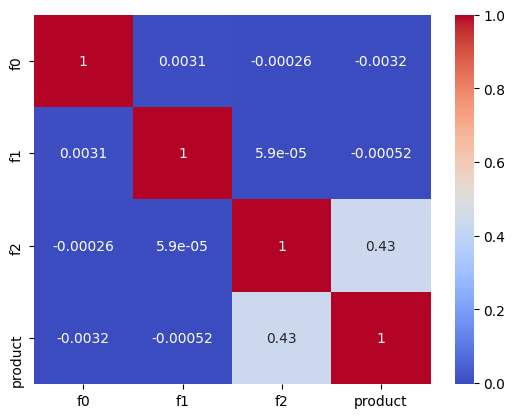

In [39]:
sns.heatmap(geo_data2_df.corr(method='spearman'), annot=True, cmap='coolwarm')

Наблюдается средняя корреляция между product и f2. Product почти никак не корррелирует с признаками f0, f1

# Обучение и проверка модели

In [40]:
def train_model(dataset):
    X = dataset.drop(['product'], axis=1)
    y = dataset['product']
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                          test_size=0.25,
                                                          random_state=42)
    model = make_pipeline(MinMaxScaler(), LinearRegression())
    model.fit(X_train, y_train)
    y_predict = model.predict(X_valid)
    
    return y_valid, y_predict
    
    

In [41]:
y_valid0, y_predict0 = train_model(geo_data0_df)
y_valid1, y_predict1 = train_model(geo_data1_df)
y_valid2, y_predict2 = train_model(geo_data2_df)

In [42]:
def get_metrics(y_true, y_predict):
    
    metrics = {}
    metrics['rmse'] = mean_squared_error(y_true, y_predict, squared=False)
    metrics['average_predict'] = y_predict.mean()
    metrics['r2'] = r2_score(y_true, y_predict)
    
    return metrics

In [43]:
print('\033[1mМетрики датасета geo_data0_df\033[0m')
get_metrics(y_valid0, y_predict0)

Метрики датасета geo_data0_df


{'rmse': 37.84265280204966,
 'average_predict': 92.46918086914606,
 'r2': 0.26598261688172153}

In [44]:
print('\033[1mМетрики датасета geo_data1_df\033[0m')
get_metrics(y_valid1, y_predict1)

Метрики датасета geo_data1_df


{'rmse': 0.8883210968605701,
 'average_predict': 68.70266157101997,
 'r2': 0.9996262960299461}

In [45]:

print('\033[1mМетрики датасета geo_data2_df\033[0m')
get_metrics(y_valid2, y_predict2)

Метрики датасета geo_data2_df


{'rmse': 40.147532751369106,
 'average_predict': 94.33698277963387,
 'r2': 0.18525295243642814}

<span style="color:black;font-weight:700;font-size:18px"> 
             Вывод
</span>

На данном этапе были обучены модели для предсказания объема запаса нефти в скважинах для каждого региона.Для этого данные разбивались тренировочную и валидационные выборки в соотношении 75:25, с последующим масштабированием признаков и обучении модели.

Обучение моделей показало следующие метрики

**значения RMSE:**

geo_data0_df RMSE: 37.84\
geo_data1_df RMSE: 0.88\
geo_data2_df RMSE: 40.14\

**значения средний запас предсказанного сырья:**

geo_data0_df average_predict: 92.46\
geo_data1_df average_predict: 68.70\
geo_data2_df average_predict: 94.33\

**значения R2:**
geo_data0_df RMSE: 0.26\
geo_data1_df RMSE: 0.99\
geo_data2_df RMSE: 0.18\

Как можно заметить самую низкую среднеквадратичнуб ошибку удалось получить для датасета geo_data1_df. Вероятнее всего это связано с тем, что в датасет присутсвует признак имеющий почти единичную корреляциюю с целевым признаком. Для других моделей получили ошибку в 37.84(1 регион) и 40.14(2 регион).

В нулевом и втором дата фрейме R2 довольно низкие. А в geo_data1_df R2 = 0.99 как и предсказывалось во время анализа на первом шаге, такой высокий коэффициент скорей всего из-за очень сильной связи целевого показателя с признаком 'f2'.

Но при этом стоит отметить, что в результате обучения моделей получили почти точные оценки среднего запаса сырья:

Для датасета geo_data0_df 92.46918(по предсказанным данным), 92.468918(реальное значение)

Для датасета geo_data1_df 68.70(по предсказанным данным), 68.801(реальное значение)

Для датасета geo_data2_df 94.33(по предсказанным данным), 94.21(реальное значение)

Можно сделать вывод о том, что простая модель линейной регрессия, учитывая r2 не очень хорошо предсказывает объем запасов для датасетов geo_data0_df и geo_data2_df

# Подготовка к расчёту прибыли

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

In [46]:
count_of_wells = 200

Бюджет на разработку скважин в регионе — 10 млрд рублей.

In [47]:
BUDGET = 10_000_000_000

In [48]:
budget_for_well = BUDGET / count_of_wells
budget_for_well

50000000.0

При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей

In [49]:
one_thousand_barrel_income = 450_000

После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

In [50]:
probability_of_losses = 0.025

**Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе.**

Для этого поделим бюджет рассчитанный на одну скважину на стоимость за одну тысячу барреллей. Получим число, которое даст нам объем добычи при котором скважина будет окупать свою разработку.

In [51]:
necessary_volume_for_well = budget_for_well / one_thousand_barrel_income
necessary_volume_for_well

111.11111111111111

Для безубыточной разработки одной скважины необходимо добыть с нее минимум 111 тыс баррелей.


<span style="color:black;font-weight:700;font-size:18px"> 
             Вывод
</span>

Всего в одном регионе бюджет в 10 млрд.руб. выделяют для разработки 200 наиболее перспективных скважин с затратами 50 милн.руб. на одну скважину. При существующем уровне цен в 450 000 руб. за тыс.баррелей, безубыточная добыча начинается со скважин с запасом в 111 тыс.баррелей. Сравнивая этот показатель со среднем объемом добываемом в трех регионах, можно сказать, что ни один регион не имеет такого среднего объема.



# Расчёт прибыли и рисков 

In [52]:
top_200_wells_0_region = pd.DataFrame(y_predict0, columns=['predicted_volume']).\
                            sort_values(by='predicted_volume', ascending=False)[:200]
top_200_wells_0_region.head()

,predicted_volume
21056,158.663205
7927,156.106999
22107,155.815178
1824,155.532891
16190,155.467952


In [53]:
top_200_wells_1_region = pd.DataFrame(y_predict1, columns=['predicted_volume']).\
                            sort_values(by='predicted_volume', ascending=False)[:200]
top_200_wells_1_region.head()

,predicted_volume
23619,140.360987
4678,139.985053
2373,139.903687
2383,139.706114
3630,139.527682


In [54]:
top_200_wells_2_region = pd.DataFrame(y_predict2, columns=['predicted_volume']).\
                            sort_values(by='predicted_volume', ascending=False)[:200]
top_200_wells_2_region.head()

,predicted_volume
8390,141.673536
673,141.656122
17650,141.630937
4097,141.629135
13256,141.591724


In [55]:
print(f"Суммарный объем добычи в регионе 0: {ceil(top_200_wells_0_region['predicted_volume'].sum())} тыс. барреллей")
print(f"Суммарный объем добычи в регионе 1: {ceil(top_200_wells_1_region['predicted_volume'].sum())} тыс. барреллей")
print(f"Суммарный объем добычи в регионе 2: {ceil(top_200_wells_2_region['predicted_volume'].sum())} тыс. барреллей")

Суммарный объем добычи в регионе 0: 29590 тыс. барреллей
Суммарный объем добычи в регионе 1: 27750 тыс. барреллей
Суммарный объем добычи в регионе 2: 27791 тыс. барреллей


Напишем функцию вычисляющую прибыль для полученного объема сырья в каждом регионе.

In [56]:
def calculate_profit(wells, development_budget, cost_of_barrel, count_of_wells=200):
    """
    wells - предсказанный объем в вышках
    count_of_wells - количество вышек для разработки
    development_budget - бюджет на разработку
    cost_of_barrel - стоимость тысячи баррелей
    
    total_profit - Прибыль в миллиардах руб.
    """
    top_count_wells = pd.DataFrame(wells, columns=['predicted_volume']).\
                          sort_values(by='predicted_volume', ascending=False)[:count_of_wells]
    
    summary_volume = top_count_wells['predicted_volume'].sum()
    total_profit = ((summary_volume * cost_of_barrel) - development_budget) / 1_000_000_000
    
    return round(total_profit,4)

In [57]:
print('Суммарная прибыль (миллиардов руб.) в регионе 0:')
print(calculate_profit(y_predict0, count_of_wells=200, development_budget=BUDGET, cost_of_barrel=one_thousand_barrel_income))
print()
print('Суммарная прибыль (миллиардов руб.) в регионе 1:')
print(calculate_profit(y_predict1, count_of_wells=200, development_budget=BUDGET, cost_of_barrel=one_thousand_barrel_income))
print()
print('Суммарная прибыль (миллиардов руб.) в регионе 2:')
print(calculate_profit(y_predict2, count_of_wells=200, development_budget=BUDGET, cost_of_barrel=one_thousand_barrel_income))




Суммарная прибыль (миллиардов руб.) в регионе 0:
3.3154

Суммарная прибыль (миллиардов руб.) в регионе 1:
2.4874

Суммарная прибыль (миллиардов руб.) в регионе 2:
2.5059


<span style="color:black;font-weight:700;font-size:18px"> 
             Вывод
</span>

Для каждого из трех регионов были отобраны 200 лучших по производительности скважин. Для этих скважин была рассчитана прибыль, которую они приносят.

Подучились след. результаты:

**Суммарная прибыль (миллиардов руб.) в регионе 0:**
3.3154

**Суммарная прибыль (миллиардов руб.) в регионе 1:**
2.4874

**Суммарная прибыль (миллиардов руб.) в регионе 2:**
2.5059


<span style="color:black;font-weight:700;font-size:22px"> 
             Расчет рисков
</span>

Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли

In [58]:
def get_values_by_bootstrap(y_predict, n_samples,development_budget, cost_of_barrel):
    state = np.random.RandomState(12345)
    values = []
    
    for i in range(1000):
        subsample = pd.Series(y_predict).sample(n=n_samples, replace=True, random_state=state).sort_values(ascending=False)[:200]
        total_income = ((subsample.sum() * cost_of_barrel) - development_budget) / 1_000_000_000
        values.append(total_income)
    
    values = pd.Series(values)
    low_q = values.quantile(0.025)
    hight_q = values.quantile(0.975)
    losses = values[values<0]
    print(f"Средняя прибыль: {round(values.mean(),4)} млрд.руб.")
    print(f"2,5%-квантиль: {round(low_q, 4)} млрд.руб.")
    print(f"97,5%-квантиль: {round(hight_q, 4)} млрд.руб.")
    print(f"Количество убыточных экспериментов:", losses.count())
    print(f"Вероятность убытков: {losses.count()/len(values) * 100}%")
    print(f"Максимальный убыток: {round(losses.min(),4)} млрд.руб.")
    print(f"Максимальная прибыль: {round(values.max(),4)} млрд.руб.")
    print(f"Количество экспериментов:", len(values))
    
        

In [59]:
print("Риски и прибыль для Регион 0:")
get_values_by_bootstrap(y_predict=y_predict0, n_samples=500,
                        cost_of_barrel=one_thousand_barrel_income, development_budget=BUDGET)

Риски и прибыль для Регион 0:
Средняя прибыль: 0.295 млрд.руб.
2,5%-квантиль: 0.085 млрд.руб.
97,5%-квантиль: 0.4876 млрд.руб.
Количество убыточных экспериментов: 1
Вероятность убытков: 0.1%
Максимальный убыток: -0.0489 млрд.руб.
Максимальная прибыль: 0.6166 млрд.руб.
Количество экспериментов: 1000


In [60]:
print("Риски и прибыль для Регион 1:")
get_values_by_bootstrap(y_predict=y_predict1, n_samples=500,
                        cost_of_barrel=one_thousand_barrel_income, development_budget=BUDGET)

Риски и прибыль для Регион 1:
Средняя прибыль: 0.4412 млрд.руб.
2,5%-квантиль: 0.0445 млрд.руб.
97,5%-квантиль: 0.8572 млрд.руб.
Количество убыточных экспериментов: 12
Вероятность убытков: 1.2%
Максимальный убыток: -0.1285 млрд.руб.
Максимальная прибыль: 1.0549 млрд.руб.
Количество экспериментов: 1000


In [61]:
print("Риски и прибыль для Регион 2:")
get_values_by_bootstrap(y_predict=y_predict2, n_samples=500, 
                        cost_of_barrel=one_thousand_barrel_income, development_budget=BUDGET)

Риски и прибыль для Регион 2:
Средняя прибыль: 0.1818 млрд.руб.
2,5%-квантиль: 0.0025 млрд.руб.
97,5%-квантиль: 0.3662 млрд.руб.
Количество убыточных экспериментов: 25
Вероятность убытков: 2.5%
Максимальный убыток: -0.1593 млрд.руб.
Максимальная прибыль: 0.4793 млрд.руб.
Количество экспериментов: 1000


<span style="color:black;font-weight:700;font-size:18px"> 
             Вывод
</span>



По итогам анализа методом Bootstrap получили наибольшая средняя прибыль у региона 1 - 0.4412 млрд.руб,(у региона 0 - 0.295 млрд.руб., у региона 2 - 0.1818 млрд.руб.)

Самая большая вероятность убытков у региона 2 - 2.5%,  у региона 0 - 0.1%,  региона 1 - 1.2%.

Так как для нас критерием выбора региона было - вероятность убытков меньше 2.5, то этим условию удовлетворяет два региона- Регион 0, Регион 1. НО так как средняя прибыль у региона 1 выше (0.4412 млрд.руб > 0.295 млрд.руб), **регион 1 предпочтительнее для бурения новой скважины**

<span style="color:black;font-weight:700;font-size:28px"> 
           Общий  вывод
</span>


Для выполнения задач работы была выполнена предварительная обработка данных, в ходе которого удалены выбросы и дубликаты. А также проведен исследовательский анализ. 

После этого была обучена модель линейной регрессии для предсказания целевого признака - product — объём запасов в скважине (тыс. баррелей).

geo_data0_df  - Регион 0.
geo_data1_df - Регион 1.
geo_data2_df - Регион 2.

**значения RMSE:**

geo_data0_df RMSE: 37.84\
geo_data1_df RMSE: 0.88\
geo_data2_df RMSE: 40.14\

**значения средний запас предсказанного сырья:**

geo_data0_df average_predict: 92.46\
geo_data1_df average_predict: 68.70\
geo_data2_df average_predict: 94.33\

**значения R2:**
geo_data0_df RMSE: 0.26\
geo_data1_df RMSE: 0.99\
geo_data2_df RMSE: 0.18\

Как можно заметить самую низкую среднеквадратичнуб ошибку удалось получить для датасета geo_data1_df. Вероятнее всего это связано с тем, что в датасет присутсвует признак имеющий почти единичную корреляциюю с целевым признаком. Для других моделей получили ошибку в 37.84(1 регион) и 40.14(2 регион).

В нулевом и втором дата фрейме R2 довольно низкие. А в geo_data1_df R2 = 0.99 как и предсказывалось во время анализа на первом шаге, такой высокий коэффициент скорей всего из-за очень сильной связи целевого показателя с признаком 'f2'.

Но при этом стоит отметить, что в результате обучения моделей получили почти точные оценки среднего запаса сырья:

Для датасета geo_data0_df 92.46918(по предсказанным данным), 92.468918(реальное значение)

Для датасета geo_data1_df 68.70(по предсказанным данным), 68.801(реальное значение)

Для датасета geo_data2_df 94.33(по предсказанным данным), 94.21(реальное значение)

Можно сделать вывод о том, что простая модель линейной регрессия, учитывая r2 не очень хорошо предсказывает объем запасов для датасетов geo_data0_df и geo_data2_df.

После чего была рассчитана безубыточный объем добычи с одной сквадижины - 111.111 тыс. баррелей.

Далее были рассчитаны прибыли с 200 лучших скважин по объему запасов, получили следующие результаты: 

**Суммарная прибыль (миллиардов руб.) в регионе 0:**
3.3154

**Суммарная прибыль (миллиардов руб.) в регионе 1:**
2.4874

**Суммарная прибыль (миллиардов руб.) в регионе 2:**
2.5059

По итогу анализов рисков были получены следующие результаты - По итогам анализа методом Bootstrap получили наибольшая средняя прибыль у региона 1 - 0.4412 млрд.руб,(у региона 0 - 0.295 млрд.руб., у региона 2 - 0.1818 млрд.руб.)

Самая большая вероятность убытков у региона 2 - 2.5%,  у региона 0 - 0.1%,  региона 1 - 1.2%.

Так как для нас критерием выбора региона было - вероятность убытков меньше 2.5, то этим условию удовлетворяет два региона- Регион 0, Регион 1. НО так как средняя прибыль у региона 1 выше (0.4412 млрд.руб > 0.295 млрд.руб), **регион 1 предпочтительнее для бурения новой скважины**



In [62]:
end_time = time.time()
print(end_time - start_time)

17.92123508453369
